In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## References


*    [Scikit Learn](https://scikit-learn.org/stable/modules/tree.html) decision tree documentation
*   [Breast Cancer dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/) - UCI Machine learning database
*   [Medium article ](https://medium.com/@chyun55555/decision-tree-classifier-with-scikit-learn-from-python-e83f38079fea) for modeling decision trees
*  [Hands-On Machine Learning book](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291) for decision trees and random forests
* [ Medium article](https://medium.com/@jaimejcheng/data-exploration-and-visualization-with-seaborn-pair-plots-40e6d3450f6d) for Seaborn pair plots


# Data Loading and Cleaning

In [38]:
data = pd.read_csv('/content/breast-cancer-wisconsin.data', header = None)

In [39]:
#rename
data = data.rename(columns = {0:'id', 1:'Thickness', 2: 'Size Uniformity', 3: 'Shape Uniformity', 4:'Marginal Adhesion',
                              5: 'Epithelial Cell Size', 6: 'Bare Nuclei', 7:'Bland Chromatin', 8: 'Normal Nucleoli', 9: 'Mitoses', 10:'diagnosis'})
data

,id,Thickness,Size Uniformity,Shape Uniformity,Marginal Adhesion,Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,diagnosis
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [40]:
data.drop('id', axis = 1, inplace = True)
data.shape

(699, 10)

In [41]:
print(data['diagnosis'].value_counts())

2    458
4    241
Name: diagnosis, dtype: int64


In [42]:
for i in data:
  print(np.unique(data[i]))

[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
['1' '10' '2' '3' '4' '5' '6' '7' '8' '9' '?']
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8 10]
[2 4]


We see that there is some data which is as strings, and another categorical column with values of 2 and 4 we need to change.


## Scikit Learn data cleaning pipeline: 


*   Use ScikitLearn to create a data cleaning pipeline 
*   Define some classes for the pipeline



In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

cancer_df = data.copy()

class NumHandler(BaseEstimator, TransformerMixin):
#transformer for data cleaning the string columns for htis dataset
  def __init__(self):  #because this will be used in the pipeline, best to have some default value
    pass
  def fit(self, X, y = None):
    return self #Transformer doesn't need to fit()/predict
  
  def transform(self, X):
    df = X.copy()
    cols = df.columns
    # cols = df.columns.drop('diagnosis')
    df[cols] = df[cols].apply(pd.to_numeric, errors='coerce') #will change string value of '?' to a null
    print(np.median(df['Bare Nuclei']))

    df['Bare Nuclei'].fillna(np.mean(df['Bare Nuclei']), inplace = True)    
    return df




    


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_absolute_error

lab_encode = ColumnTransformer(transformers = [('label_encoder', LabelEncoder(), ['diagnosis'])],
                               remainder = 'passthrough')


attributes = list(cancer_df.columns)[:-1]
cat_attributes = ["diagnosis"]

num_pipeline = Pipeline([
    ('numeric handler', NumHandler()),
    ('minmax_scaler', MinMaxScaler())
])


full_cleaning_pipeline = ColumnTransformer([
    
    ("num", num_pipeline, attributes)  ,
    ("cat", OneHotEncoder(), cat_attributes)  
])

df_prepared = full_cleaning_pipeline.fit_transform(cancer_df)

df_prepared.shape



nan


(699, 11)

In [45]:
df_prepared = np.delete(df_prepared, -2, axis = 1)
print(pd.DataFrame(df_prepared))

            0         1         2         3         4         5         6  \
0    0.444444  0.000000  0.000000  0.000000  0.111111  0.000000  0.222222   
1    0.444444  0.333333  0.333333  0.444444  0.666667  1.000000  0.222222   
2    0.222222  0.000000  0.000000  0.000000  0.111111  0.111111  0.222222   
3    0.555556  0.777778  0.777778  0.000000  0.222222  0.333333  0.222222   
4    0.333333  0.000000  0.000000  0.222222  0.111111  0.000000  0.222222   
..        ...       ...       ...       ...       ...       ...       ...   
694  0.222222  0.000000  0.000000  0.000000  0.222222  0.111111  0.000000   
695  0.111111  0.000000  0.000000  0.000000  0.111111  0.000000  0.000000   
696  0.444444  1.000000  1.000000  0.222222  0.666667  0.222222  0.777778   
697  0.333333  0.777778  0.555556  0.333333  0.222222  0.333333  1.000000   
698  0.333333  0.777778  0.777778  0.444444  0.333333  0.444444  1.000000   

            7         8    9  
0    0.000000  0.000000  0.0  
1    0.111111

In [46]:
pd.DataFrame(df_prepared).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [47]:
data = pd.DataFrame(df_prepared)
data = data.rename(columns = { 0:'Thickness', 1: 'Size Uniformity', 2: 'Shape Uniformity', 3:'Marginal Adhesion',
                              4: 'Epithelial Cell Size', 5: 'Bare Nuclei', 6:'Bland Chromatin', 7: 'Normal Nucleoli', 8: 'Mitoses', 9:'diagnosis'})

data



,Thickness,Size Uniformity,Shape Uniformity,Marginal Adhesion,Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,diagnosis
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.000000,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
694,0.222222,0.000000,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000,0.000000,0.0
695,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.0
696,0.444444,1.000000,1.000000,0.222222,0.666667,0.222222,0.777778,1.000000,0.111111,1.0
697,0.333333,0.777778,0.555556,0.333333,0.222222,0.333333,1.000000,0.555556,0.000000,1.0


# Data Visualizations

In [ ]:
#create dataframe better for visualizations using 'b' and 'm' for diagnosis
datav = data.copy()

datav.loc[datav['diagnosis'] == 0, 'diagnosis'] = 'benign'
datav.loc[datav['diagnosis'] == 1, 'diagnosis'] = 'malignant'


datav.head()



,Thickness,Size Uniformity,Shape Uniformity,Marginal Adhesion,Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,diagnosis
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0,benign
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0,benign
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0,benign
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0,benign
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0,benign


Creating a pairplot to show the relationships between size and the diagnosis. You can see that generally, oversized attributes of cells are phenomenal indicators of whether a cell is malignant or benign

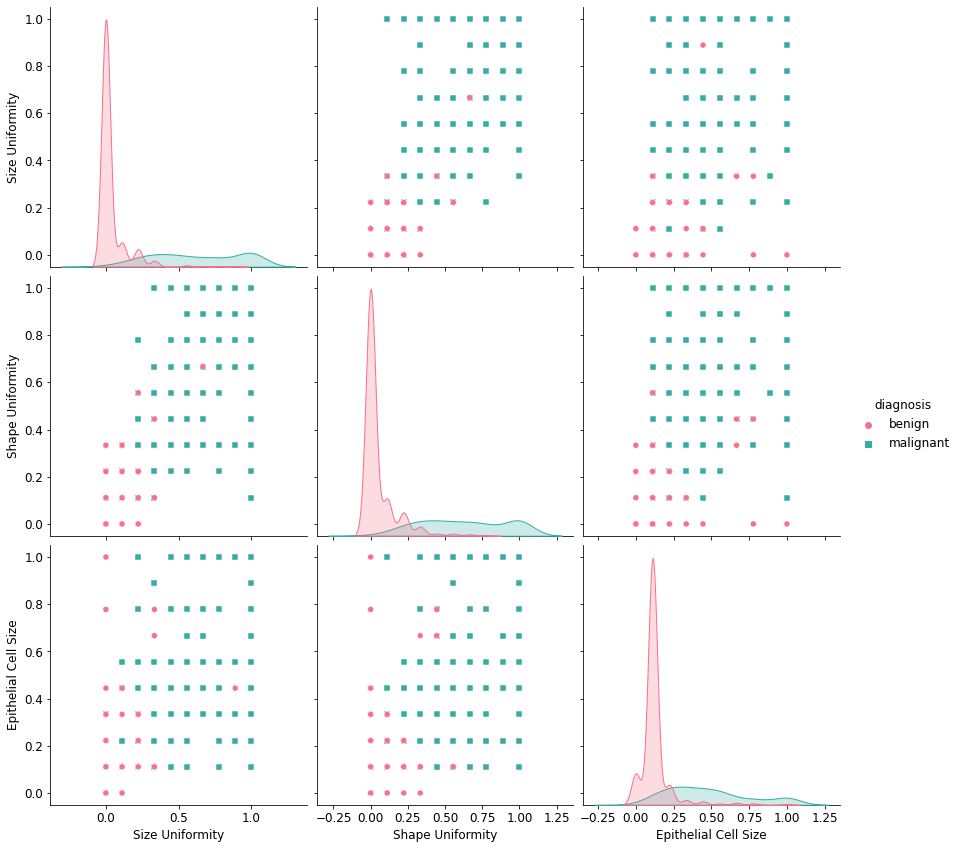

In [ ]:
plot = datav[['Size Uniformity','Shape Uniformity','Epithelial Cell Size','diagnosis']]
sns.pairplot(plot, hue='diagnosis', vars=['Size Uniformity','Shape Uniformity','Epithelial Cell Size'], palette="husl", markers=["o", "s"],height=4)

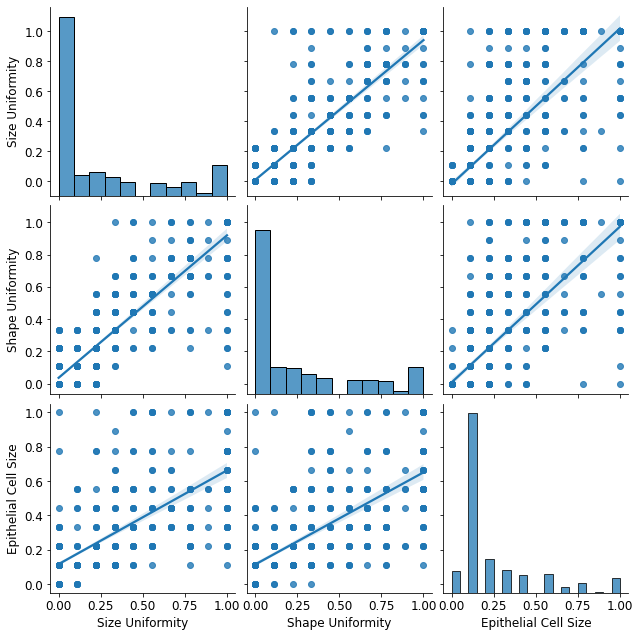

In [ ]:
sns.pairplot(plot, kind = 'reg',height = 3)

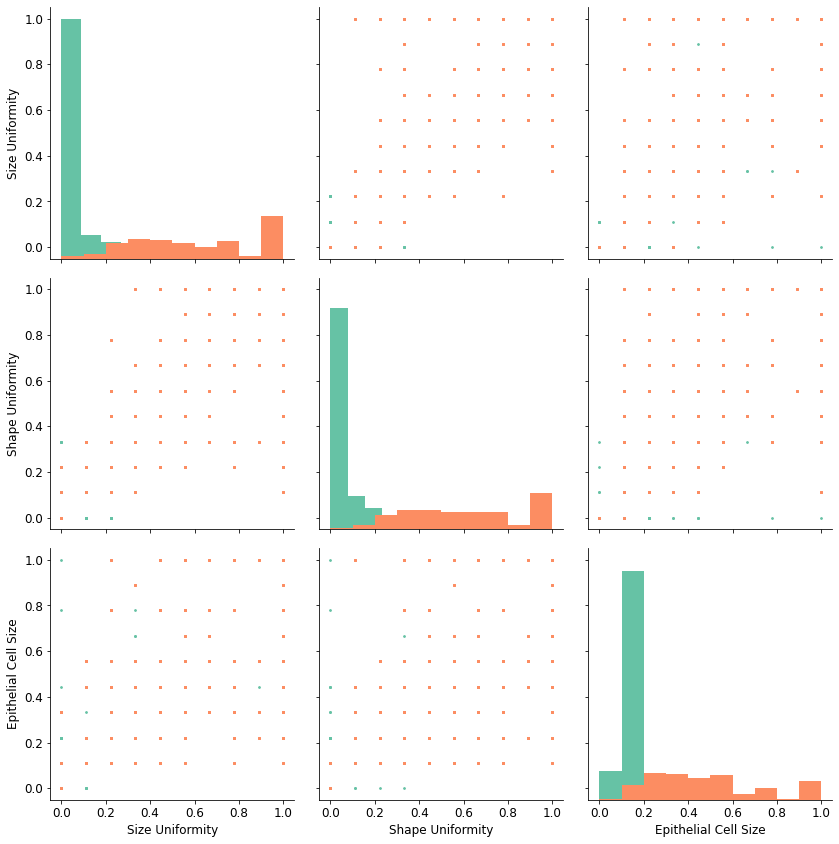

In [ ]:
g = sns.PairGrid(plot, hue="diagnosis", palette="Set2",height=4,hue_kws={"marker": ["o", "s"]})
g = g.map_diag(plt.hist) #graph the diagonals differently
g = g.map_offdiag(plt.scatter, s = 3) 

Seems like most of the graphs below indicate that there isn't much other data issues, the distributions seem to be reasonable

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7bfe077cd0>


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


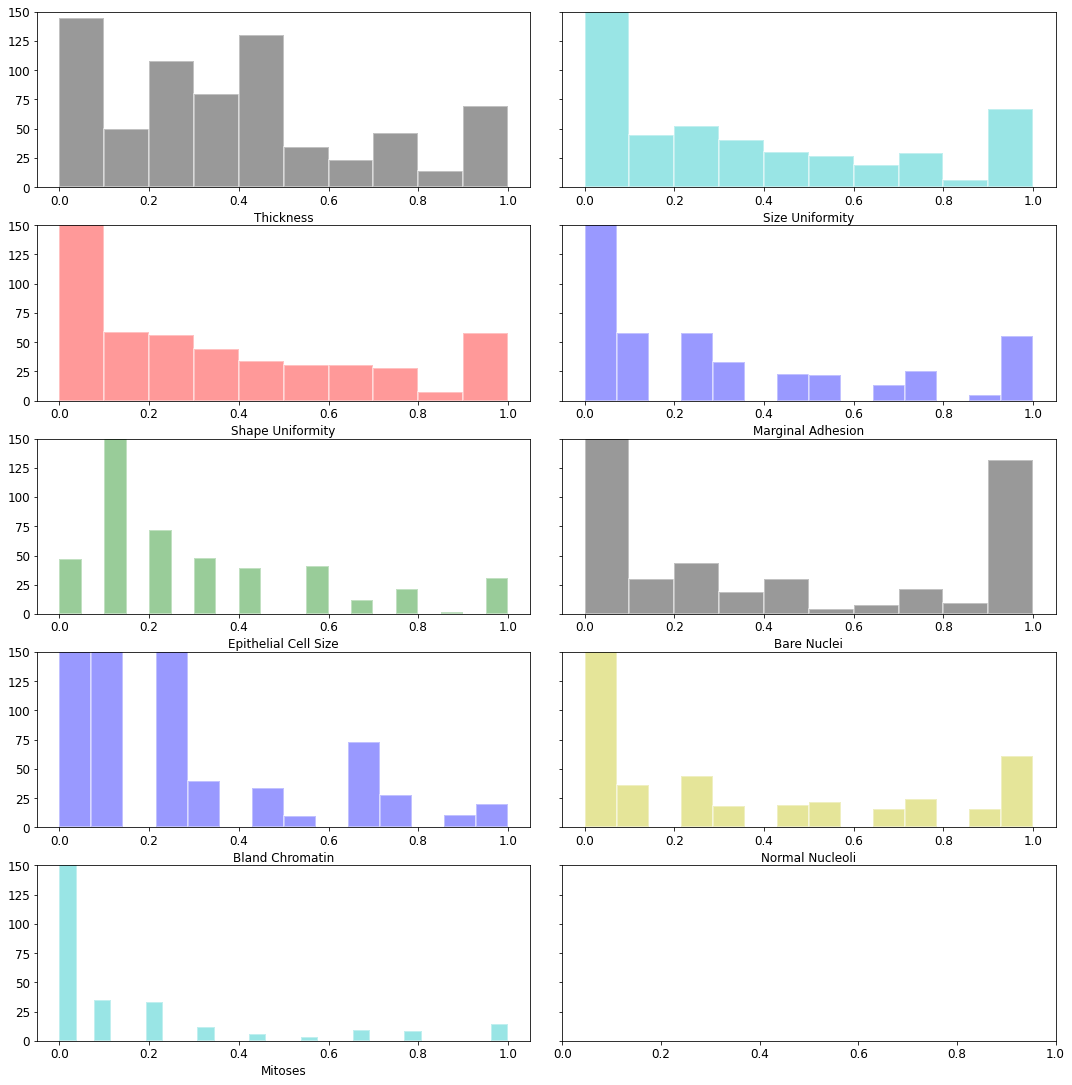

In [ ]:
colors = np.array('b g r c m y k'.split()) #Different colors for plotting

fig,axes = plt.subplots(nrows =5,ncols=2, sharey=True,figsize = (15,15))
print(axes) #we see axes is an array with 5 rows where each row is made of two axes
            #So if we want to iterate, we need to get the row we want to work with for the graphs
plt.tight_layout()
row = 0
iteration = 0
for i in range(0,len(data.columns[:-1])):
    iteration+=1
    if(i%2==0):
        k = 0
    else:
        k = 1
    sns.distplot(data[data.columns[i]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),
                 color = np.random.choice(colors) ,ax=axes[row][k]) #here we decide which spot in the subplots we are filling out under ax = 
    if(iteration%2==0):
        row+=1
        plt.ylim(0,150)

In [ ]:
malignant = datav[datav['diagnosis'] == 'malignant']
benign = datav[datav['diagnosis'] == 'benign']
observe = list(datav.columns[:-1])

Now to compare the two categories on each variable

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


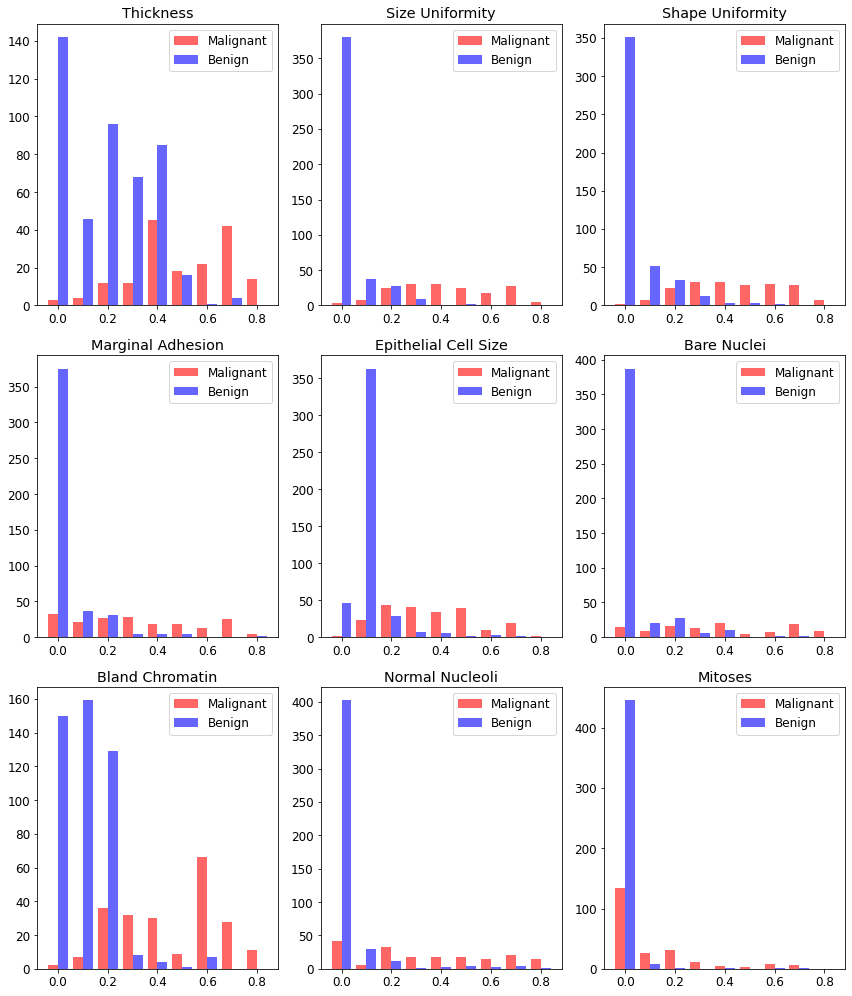

In [ ]:
plt.rcParams.update({'font.size': 12})
plot, graphs = plt.subplots(nrows=3, ncols=3, figsize=(12,14))
graphs = graphs.flatten() #flatten into a 1d array, the identifiers for each graph
for i, graph in enumerate(graphs): #for each index and graph identifier
    binwidth= .1
    bins = np.arange(0,1,binwidth) #set bins with spaces in between actual values for visualizations
    graph.hist([malignant[observe[i]],benign[observe[i]]], bins=bins, alpha=0.6, label=['Malignant','Benign'], 
               color=['red','blue'], align = 'left', stacked = False, orientation = 'vertical')
    graph.legend(loc='upper right')
    graph.set_title(observe[i])
plt.tight_layout()

# Decision Tree model

Advantages
*   Decision trees are logarithmic in cost, meaning that this is not very intensive. Meaning this could be scaled to a much larger dataset
*   White box, meaning that we can actually understand how this works
*   Minimal data preparation needed

Disadvantages
*   Prone to overfit, we could prune to see if that helps
*   Slightly unstable, there might be better trees that represent the true population better
*   Requires a balanced dataset without "inadequate" attributes. Meaning we can't have several examples where the same set of attributes are indicative of different classes 



In [48]:
X = data.drop(['diagnosis'], axis = 1)
y = data['diagnosis'].values

## Testing data adequacy: 
> These take a while to run so they arent really needed

==================================================================

\
There are about 284 objects where there is another row with the same attributes

\
However, there are 0 objects where the attributes are the same but the class is different, meaning that this is an *adequate* dataset for a decision tree
 * This makes it an ideal dataset for a classification tree because there is no confusion as to how a combination of attributes indicates the class   

==================================================================
 



In [ ]:
#This is the number of rows that have another row that is the exact same
# count = 0

# for row in data.iterrows():
  
#   for row_compare in data.iterrows():
#     if row[1][:-1].equals(row_compare[1][:-1]) and row[1][-1] == row_compare[1][-1] and row[0] != row_compare[0]:
#       count += 1
#       break

# print(count)
    



In [ ]:
#This is the number of rows that have the same attributes, but are a different "class"
# count = 0
# for row in data.iterrows():
  
#   for row_compare in data.iterrows():
#     if row[1][:-1].equals(row_compare[1][:-1]) and row[1][-1] != row_compare[1][-1] and row[0] != row_compare[0]:
#       count += 1
#       break

# print(count)

## Model from ScikitLearn


*   Uses CART algorithm, meaning that each leaf can only have two children. aka binary trees
*   ID3 algorithm could produce nodes with more than 2 children




In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.tree import export_graphviz


(CART) references the two types of decision trees we usually see: \

Classification (discrete variable) and Regression (continuous variable) Trees

\
Sklearn offers both of these as the two types of decision trees, because this is a classification problem we use the classifier

In [50]:
#split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#create decision tree
d_tree = DecisionTreeClassifier()

d_tree.fit(x_train, y_train)


DecisionTreeClassifier()

In [ ]:
#visualize decision tree
dot = export_graphviz(d_tree, feature_names = x.columns, class_names = ['benign', 'malignant'], out_file = 'tree.dot', filled = True)

In [ ]:
!dot -Tpng tree.dot -o tree.png   

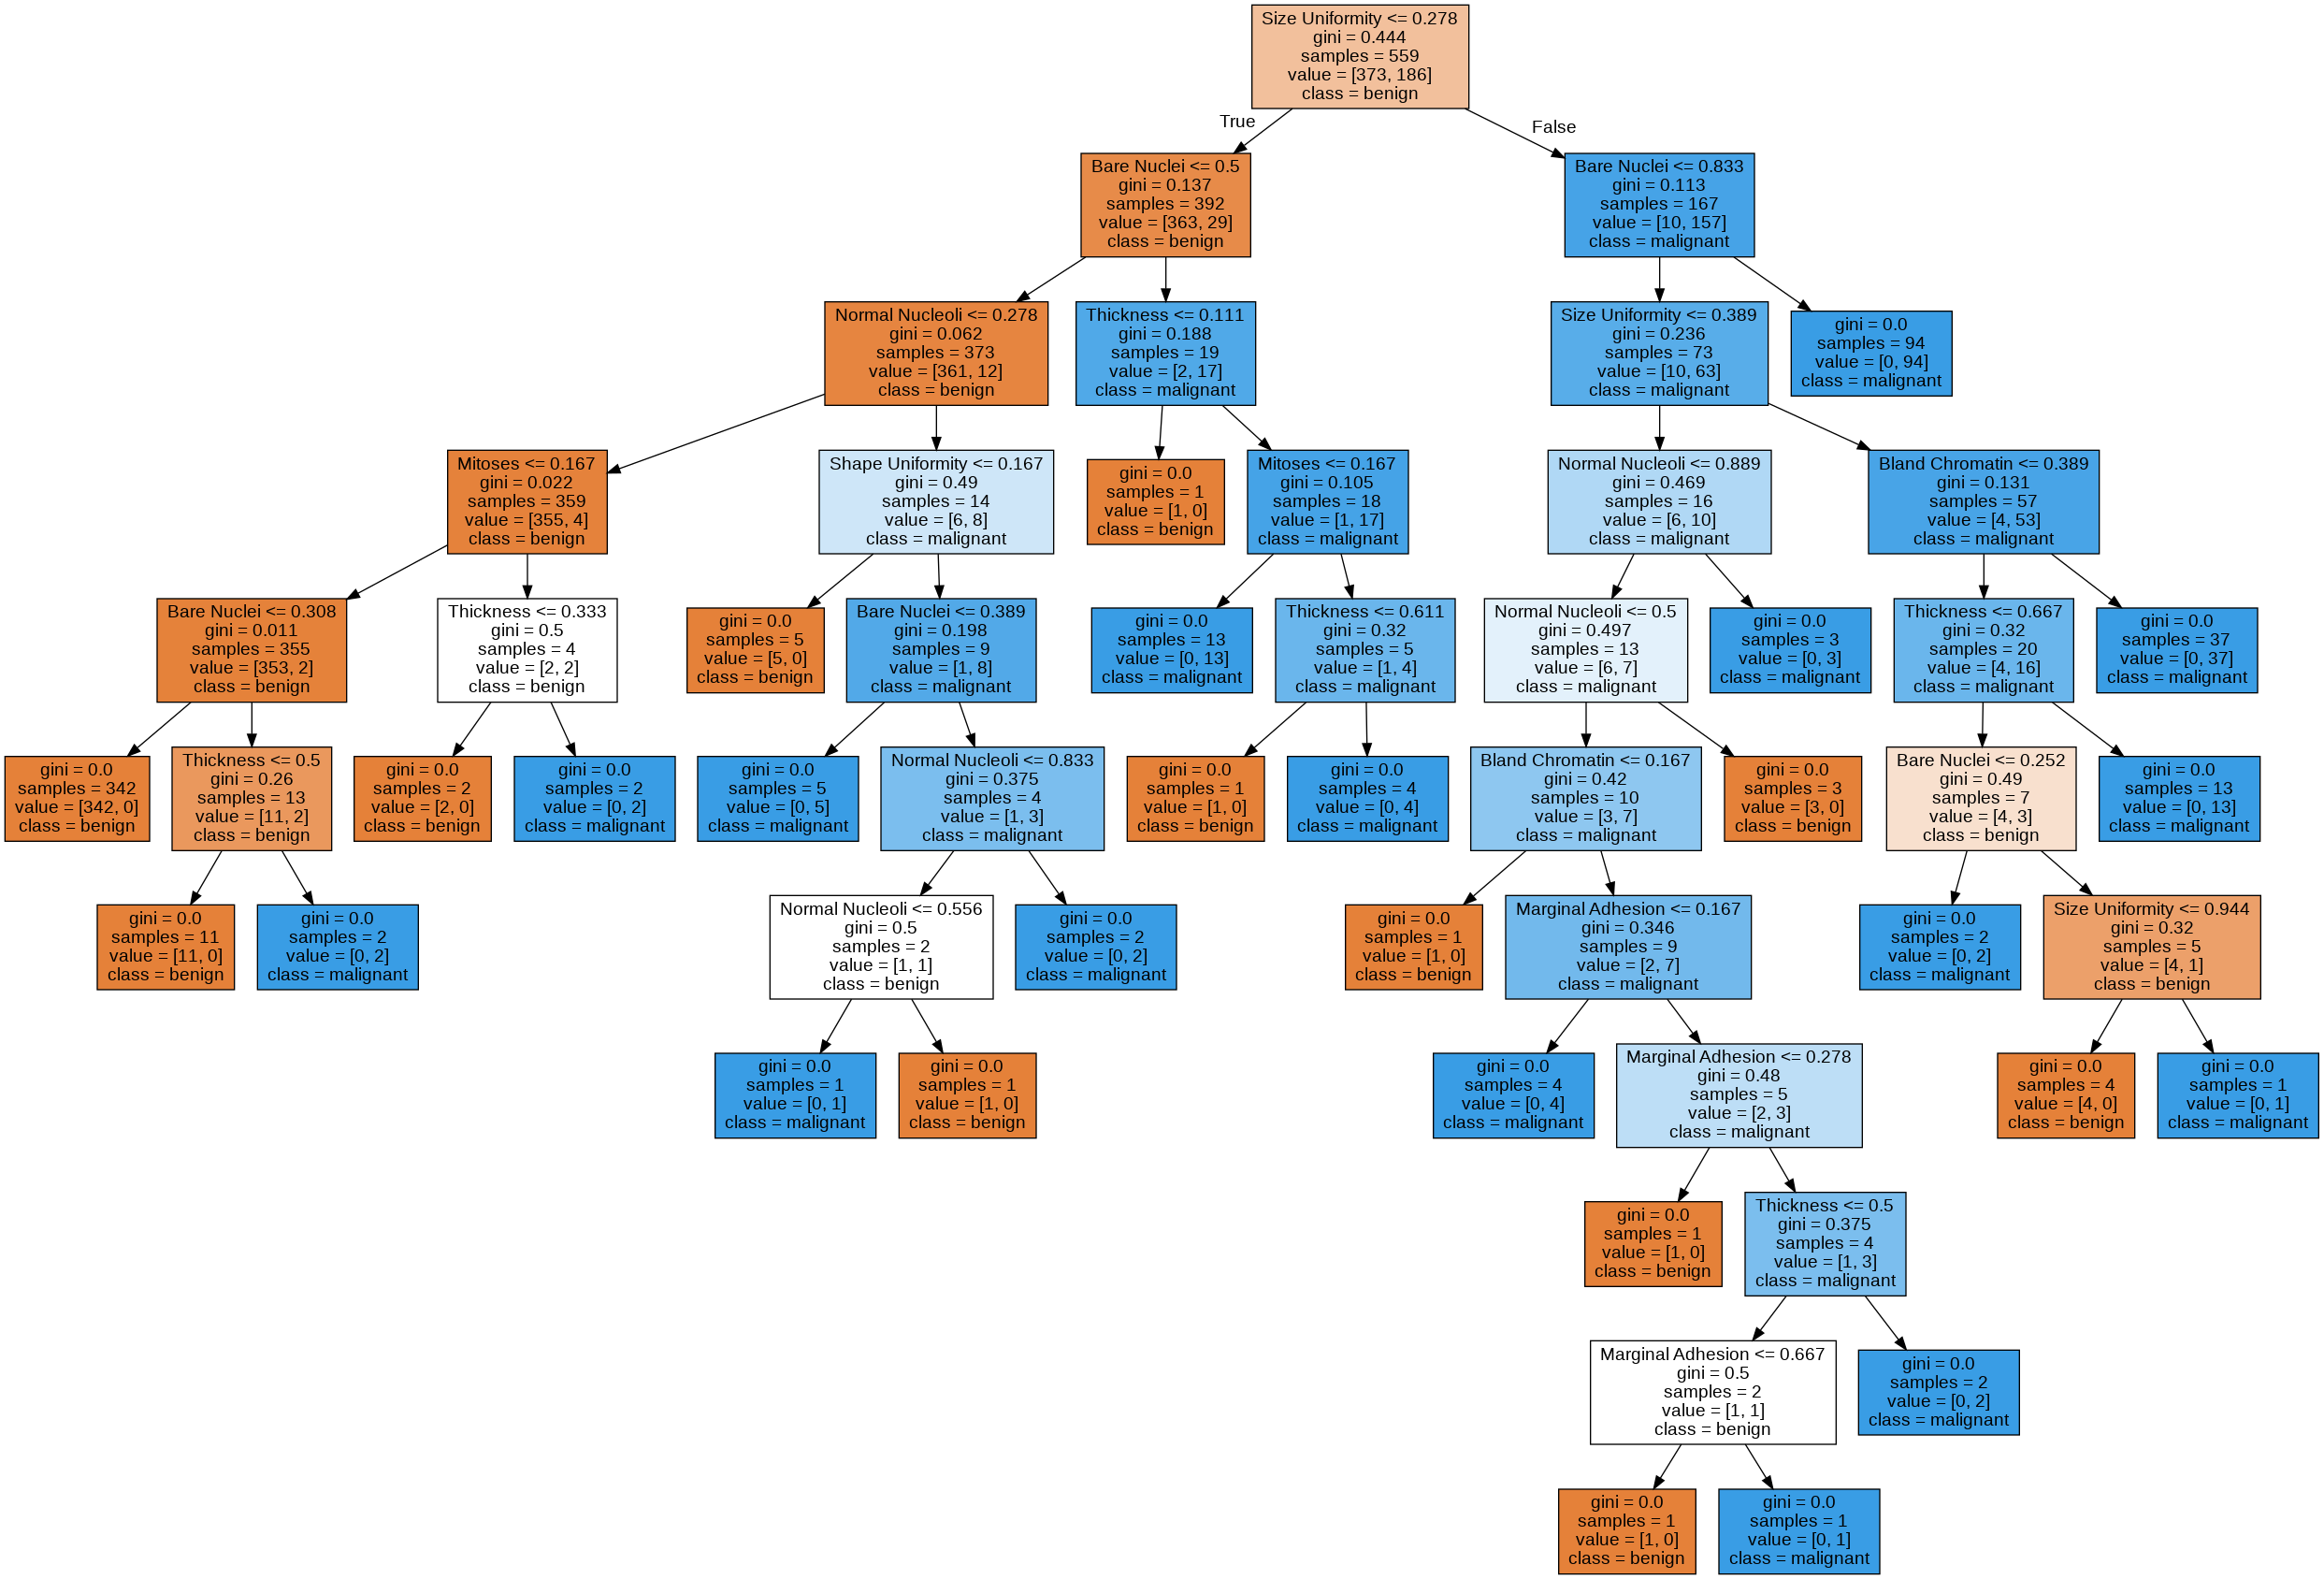

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


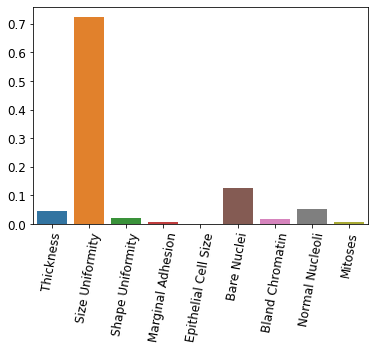

In [ ]:
sns.barplot(data.columns[:-1], d_tree.feature_importances_)
plt.xticks(rotation = 80)
plt.show()

As you can see above, this model has a very large depth of 11, meaning that it might be overfitting to some of the data

Let's test the accuracy of the model above with cross validation

*   Below we see that the scores are averaging at around 90%
*   To improve this model, we can try playing around with the hyperparameters



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(d_tree, x_train, y_train,
                         scoring = 'f1', cv = 5)
scores

array([0.85714286, 0.89473684, 0.87671233, 0.91666667, 0.84848485])


* We notice above that this tree goes to a depth of 11, because we actually didn't set a depth, so let's see what happens if we set it to 8


* What this might do is reduce overfitting by regularizing the model

* Other ways you might regularize is by increasing the min hyperparameters or reducing the max hyperparameters


In [ ]:
#create decision tree
d_tree = DecisionTreeClassifier(max_depth = 8)
d_tree.fit(x_train, y_train)

#visualize decision tree
dot = export_graphviz(d_tree, feature_names = X.columns, class_names = ['benign', 'malignant'], out_file = 'tree.dot', filled = True)

#save decision tree
!dot -Tpng tree.dot -o tree.png   

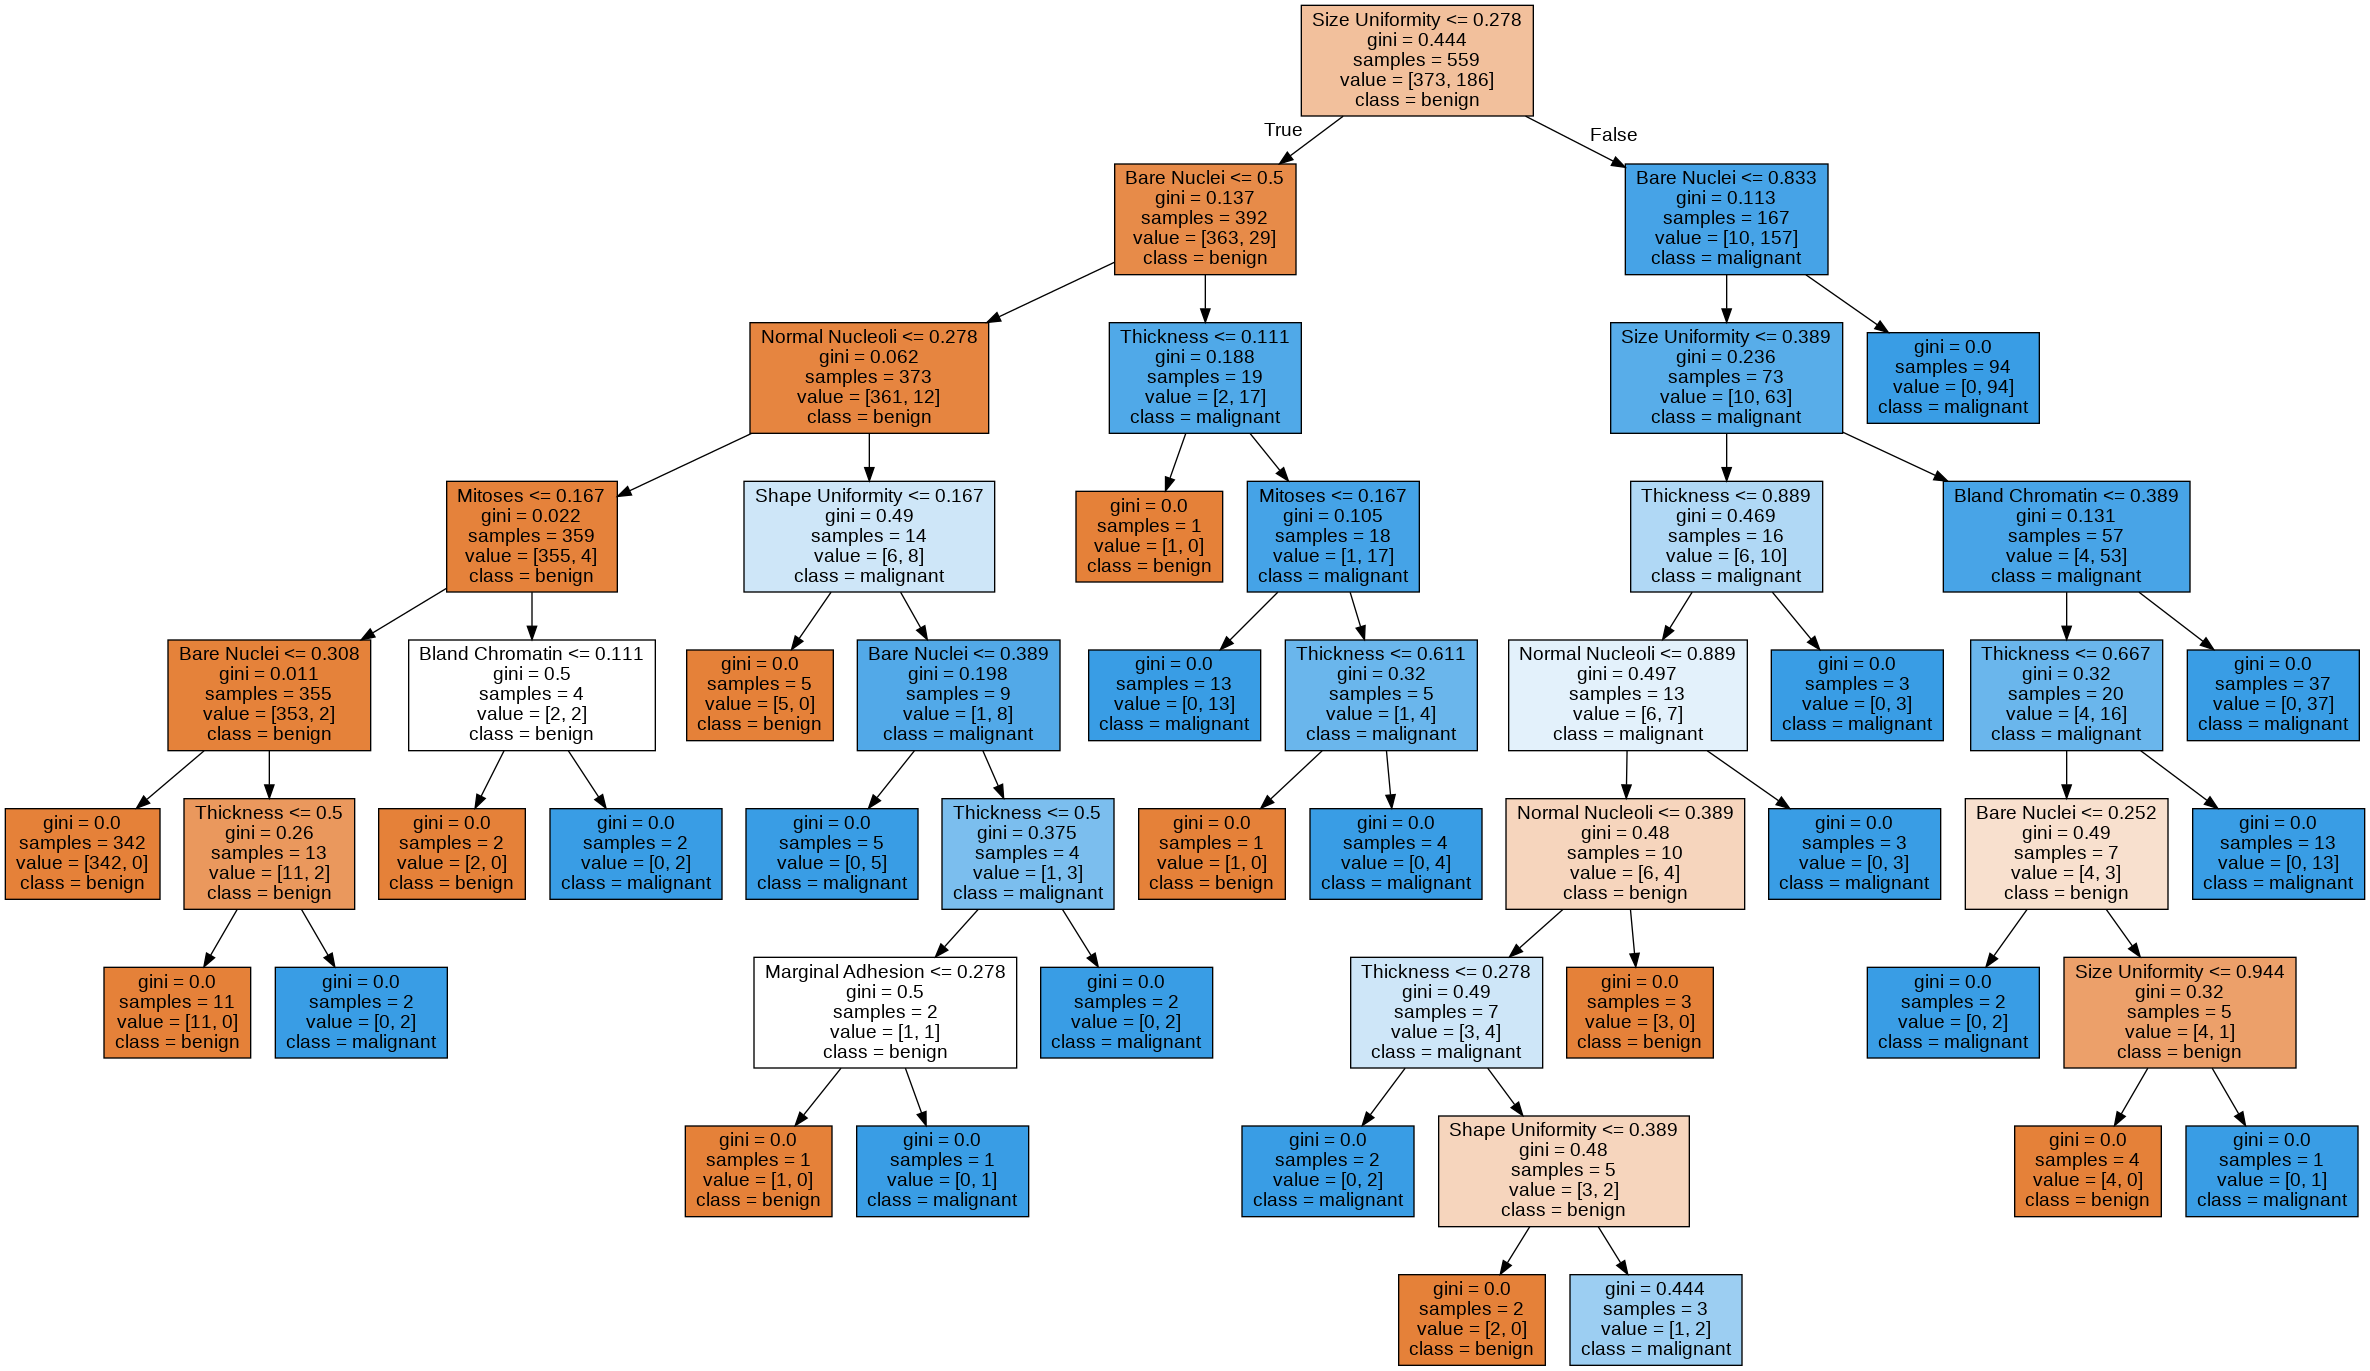

In [ ]:
scores = cross_val_score(d_tree, X, y,
                         scoring = 'f1', cv = 5)
scores

array([0.83146067, 0.91262136, 0.91666667, 0.93877551, 0.92307692])



*   Above if you run the decision tree model multiple times, you actually find that the prediction accuracy can change, this is because there is some probability involved in calculting the trees. Moving forward we will use a random state = 42
*   The scores when changing only the max_depth is not much better. So instead of doing it manually, let's use grid search to work through all the combinations of parameters



# Hyper parameter tuning for models and cross validation with grid search

---



Below we create a list of possible parameters. We use grid search from sklearn to do this

*   We test these using an f1 score because this is a **binary classification problem**
*   We are testing the depth at levels from 4 to 11(the depth when no cap was set) in conjunction with a range of values for min_samples_leaf and min_samples_split
*   Finally we also test using entropy as our criterion parameter with the same levels from the previous test



In [ ]:
from sklearn.model_selection import GridSearchCV

depth_levels = np.arange(4,12)

min_leaf_levels = np.arange(1,5)

min_split_levels = np.arange(2,7)

param_grid = [
    {'max_depth':depth_levels, 'min_samples_leaf':min_leaf_levels, 'min_samples_split':min_split_levels}, #hyper parameter options
    {'criterion': ['entropy'], 'max_depth':depth_levels, 'min_samples_leaf':min_leaf_levels, 'min_samples_split':min_split_levels}, #add entropy as a criterion
]

d_tree = DecisionTreeClassifier(random_state = 42) #set the random state to be the same each time for the grid search

grid_search = GridSearchCV(d_tree, param_grid, cv = 5,
                           scoring = 'f1', return_train_score = True)

grid_search.fit(x_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11]),
                          'min_samples_leaf': array([1, 2, 3, 4]),
                          'min_samples_split': array([2, 3, 4, 5, 6])},
                         {'criterion': ['entropy'],
                          'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11]),
                          'min_samples_leaf': array([1, 2, 3, 4]),
                          'min_samples_split': array([2, 3, 4, 5, 6])}],
             return_train_score=True, scoring='f1')

In [ ]:

#Get the best parameters based on cross-validation scoring
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 6}

In [ ]:
#view all the scores and parameter combinations
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(mean_score), params)



0.9611481014667769 {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9611481014667769 {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.9584886894732166 {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.9584886894732166 {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.9584886894732166 {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 6}
0.9564216934030829 {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.9564216934030829 {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.9564216934030829 {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 4}
0.9564216934030829 {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.9580222532940651 {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 6}
0.954986006522745 {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}
0.954986006522745 {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3}
0.9549



*   We get a mean cross validation score of 96.27% using the above hyper parameters
*   Note that there are several combinations above that actually give us this score
*   The best_params_ gives us the one with the lowest max_depth, min_samples_leaf, min_samples_split respectively out of the ones with the best score



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


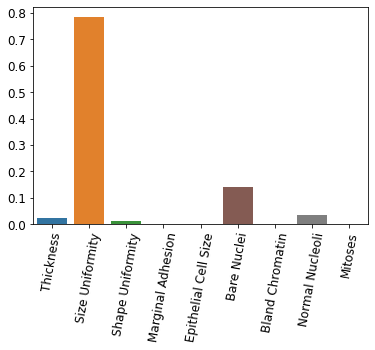

In [ ]:
sns.barplot(data.columns[:-1], grid_search.best_estimator_.feature_importances_)
plt.xticks(rotation = 80)
plt.show()


*   Above we can see that there are really only 5 features that matter at all
*   Best to maybe drop the other features, and test out the model again



## Final decision tree model

In [262]:
x_train_dropped = x_train[['Thickness', 'Size Uniformity', 'Shape Uniformity', 'Bare Nuclei', 'Normal Nucleoli']]

x_test_dropped = x_test[['Thickness', 'Size Uniformity', 'Shape Uniformity', 'Bare Nuclei', 'Normal Nucleoli']]

#create decision tree using best parameters from before
d_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_samples_leaf = 2, min_samples_split = 6)
d_tree.fit(x_train_dropped, y_train)

#visualize decision tree
dot = export_graphviz(d_tree, feature_names = x_train_dropped.columns, class_names = ['benign', 'malignant'], out_file = 'tree.dot', filled = True)

#save decision tree
!dot -Tpng tree.dot -o tree.png   

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       min_samples_split=6)

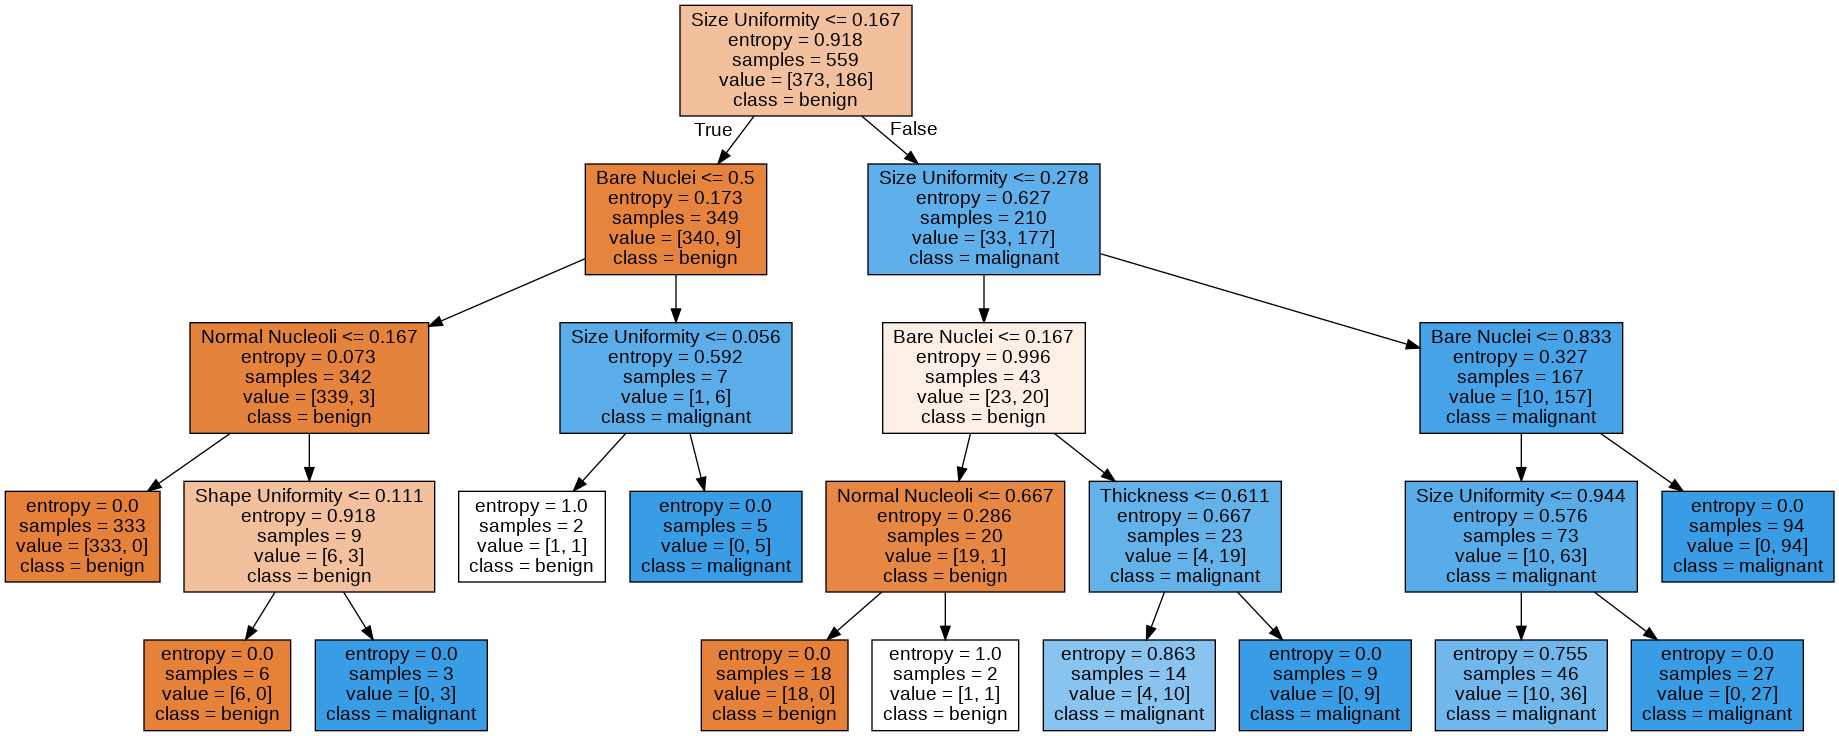

In [309]:
predictions = d_tree.predict(x_test_dropped)

sum(predictions == y_test) / len(y_test)


0.9428571428571428

# In Conclusion:


*   It looks like our optimal model is with a criterion = entropy, max_depth of 4, min_samples_leaf of 2, and min_samples_split of 6
*   We are able to acheive an accuracy of around 96% using this decision tree classifier, after optimizing some of our hyperparameters




# Random Forest Implementation - from scratch


*   Implement a random forest using the decision tree logic we built above
*   



In [372]:

class RandomForest:

  def __init__(self, n_trees, params, max_samples = None, threshold = 0.50, bootstrap = True, feature_split = 'sqrt'):
    #params will be a dictionary of the parameters we need
      #These are the decision tree parameters
    #Defined Variables#
    self.max_depth = params['max_depth']
    self.min_samples_leaf = params['min_samples_leaf']
    self.min_samples_split = params['min_samples_split']
    self.criterion = params['criterion']
    self.n_trees = n_trees

    #Defaulted variables#
    self.threshold = threshold
    self.bootstrap = bootstrap
    self.max_samples = max_samples
    
    self.feature_split_options = ['sqrt', 'log2', 'none']
    if feature_split in self.feature_split_options:
      self.feature_split = feature_split
    else: #just default to sqrt
      self.feature_split = 'sqrt'

    #Calculated variables#
    self.trees = [self.create_tree() for i in range(self.n_trees)]
    # self.final_predictions = list()
    self.individual_predictions = dict()
    self.cache = list()


  def sample_data(self, X, y):
    #First, split the data
      #create subsamples of the data to split among the trees AKA - random resampling (BOOTSTRAPPING)
    if self.max_samples is None:
      #case when none, we want to resample the whole dataset
      sample_size = X.shape[0]
    else:
      sample_size = self.max_samples
    # print('here is the size', len(X))

    sampled_X = np.random.choice(len(X), sample_size, replace = True)
    # print('here is the length',len(sampled_X))
    # print('here is the sample size', sample_size)

    X_sampled = np.empty((0, X.shape[1]), float)
    y_sampled = np.empty((0, 1), int)
    for row in sampled_X:
      X_sampled = np.vstack((X_sampled, X[row]))
      y_sampled = np.vstack((y_sampled, y[row]))
    
    return X_sampled, y_sampled
  
  def fit(self, X, y):

    if self.feature_split == self.feature_split_options[0]:
      
      num_feat = np.ceil(np.sqrt(X.shape[1]))
    elif self.feature_split == self.feature_split_options[1]:
      num_feat = np.floor(np.log2(X.shape[1]) + 1)
    else:
      #no split at all
      num_feat = X.shape[1]
    
    # num_feat = 3

    #fit each decision tree and put the trees back in the variables
    for tree in self.trees:
      feat = sorted(np.random.choice(X.shape[1], int(num_feat), replace = False))
      self.cache.append(feat)
      # print(feat)

      # print(X[:, [feat]].shape)
      X_train, y_train = self.sample_data(X[:, feat], y)
      # print(X_train.shape)
      tree.fit(X_train, y_train)

  def create_tree(self):
    tree = DecisionTreeClassifier(criterion = self.criterion,
                                  max_depth = self.max_depth,
                                  min_samples_leaf = self.min_samples_leaf,
                                  min_samples_split = self.min_samples_split)
    
    return tree
    
  def predict(self, X):
    #Make predictions for each tree, and store the values to a variable here (decision function maybe)
    
    #clear old predictions at start
    self.individual_predictions = dict()

    #initialize variables
    i = 0
    final_predictions = list()

    for X_train in X:
      X_train = np.array(X_train)
      preds = list()
      tree_num = 0
      for tree in self.trees:
        # print(self.cache[i])
        # print(X_train.shape)
        # print(X_train[[self.cache[i]]].shape)
        diagnosis = tree.predict(np.array(X_train[[self.cache[tree_num]]]).reshape(1, -1))
        preds.append(diagnosis)
        tree_num+=1

      self.individual_predictions[str(i+1)] = preds
      i += 1
      
      ones = list(); zeros = list()
      for pred in preds:

        if pred == 1:
          ones.append(pred)
        else:
          zeros.append(pred)
        
      if len(ones)/(len(ones) + len(zeros)) >= self.threshold:
        final_predictions.append(1)
      else:
        final_predictions.append(0)

    return final_predictions

  def change_threshold(self, value):
    #The threshold for the voting in the random forest
    if value < 1.0 & value > 0:
      self.threshold = value
    else:
      print ('update not possible, threshold has to be between 0 and 1')


In [403]:
import warnings
warnings.simplefilter("ignore")

params = {'criterion':'entropy', 'max_depth':4, 'min_samples_leaf':2, 'min_samples_split': 2}

rf_classifier = RandomForest(128, params)

# x_train_dropped = x_train[['Thickness', 'Size Uniformity', 'Shape Uniformity', 'Bare Nuclei', 'Normal Nucleoli']]
x_train_dropped = x_train


# x_test_dropped = x_test[['Thickness', 'Size Uniformity', 'Shape Uniformity', 'Bare Nuclei', 'Normal Nucleoli']]
x_test_dropped = x_test

rf_classifier.fit(np.array(x_train_dropped), y_train)

predictions = rf_classifier.predict(np.array(x_test_dropped))
sum(predictions == y_test) / len(y_test)




0.9785714285714285

In [318]:
rf_classifier.individual_predictions

{'1': [array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.])],
 '2': [array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),
  array([0.]),